In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [2]:
print(train_images.shape)

print(len(train_labels))

train_labels


(60000, 28, 28)
60000


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [3]:
print(test_images.shape)

print(len(test_labels))

test_labels


(10000, 28, 28)
10000


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [4]:
test_images[0:2].shape

(2, 28, 28)

In [5]:
train_images1 = train_images.copy()

In [6]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(784,)))
network.add(layers.Dense(10, activation='softmax'))

In [7]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [8]:
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])


In [9]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [10]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [11]:
test_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [12]:
train_images[0:5].shape

(5, 784)

In [13]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.4298 - accuracy: 0.8758
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1075 - accuracy: 0.9673
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0673 - accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0485 - accuracy: 0.9856
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0367 - accuracy: 0.9891


In [14]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)


313/313 [==============================] - 1s 2ms/step - loss: 0.0687 - accuracy: 0.9808
test_acc: 0.9807999730110168


In [15]:
train_images.ndim

2

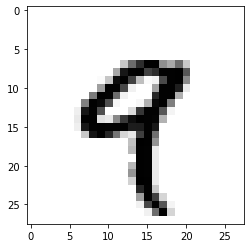

In [16]:
digit = train_images1[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()


In [17]:
train_images1.shape

(60000, 28, 28)

In [18]:
train_images1.ndim

3

In [19]:
my_slice = train_images1[10:100, :, :]
my_slice.shape


(90, 28, 28)

In [20]:
my_slice1 = train_images1[:, 10:, 15:]

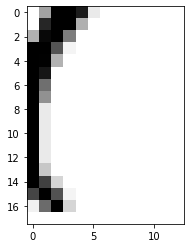

In [21]:
digit = my_slice1[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [22]:
my_slice2 = train_images1[1]
my_slice2

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

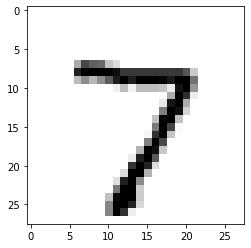

In [23]:
import matplotlib.pyplot as plt
plt.imshow(test_images[0].reshape(28,28), cmap=plt.cm.binary)
plt.show()

In [24]:
batch = train_images1[:128]

In [25]:
batch.shape

(128, 28, 28)

In [26]:
test_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [27]:
test_images[0].shape

(784,)

In [32]:
import numpy as np
np.round(network.predict(test_images[0].reshape(1,784)),2)


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)